<a href="https://colab.research.google.com/github/Sachinthotre/Credit_Card_Fraud_Detection/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report,  confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier  # Corrected import statement
from xgboost import plot_importance

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")



In [3]:
#EXPLORATORY DATA ANALYSIS

#mounting  the google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:

# loading the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

#df = pd.read_csv('data/creditcard_csv')
df



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

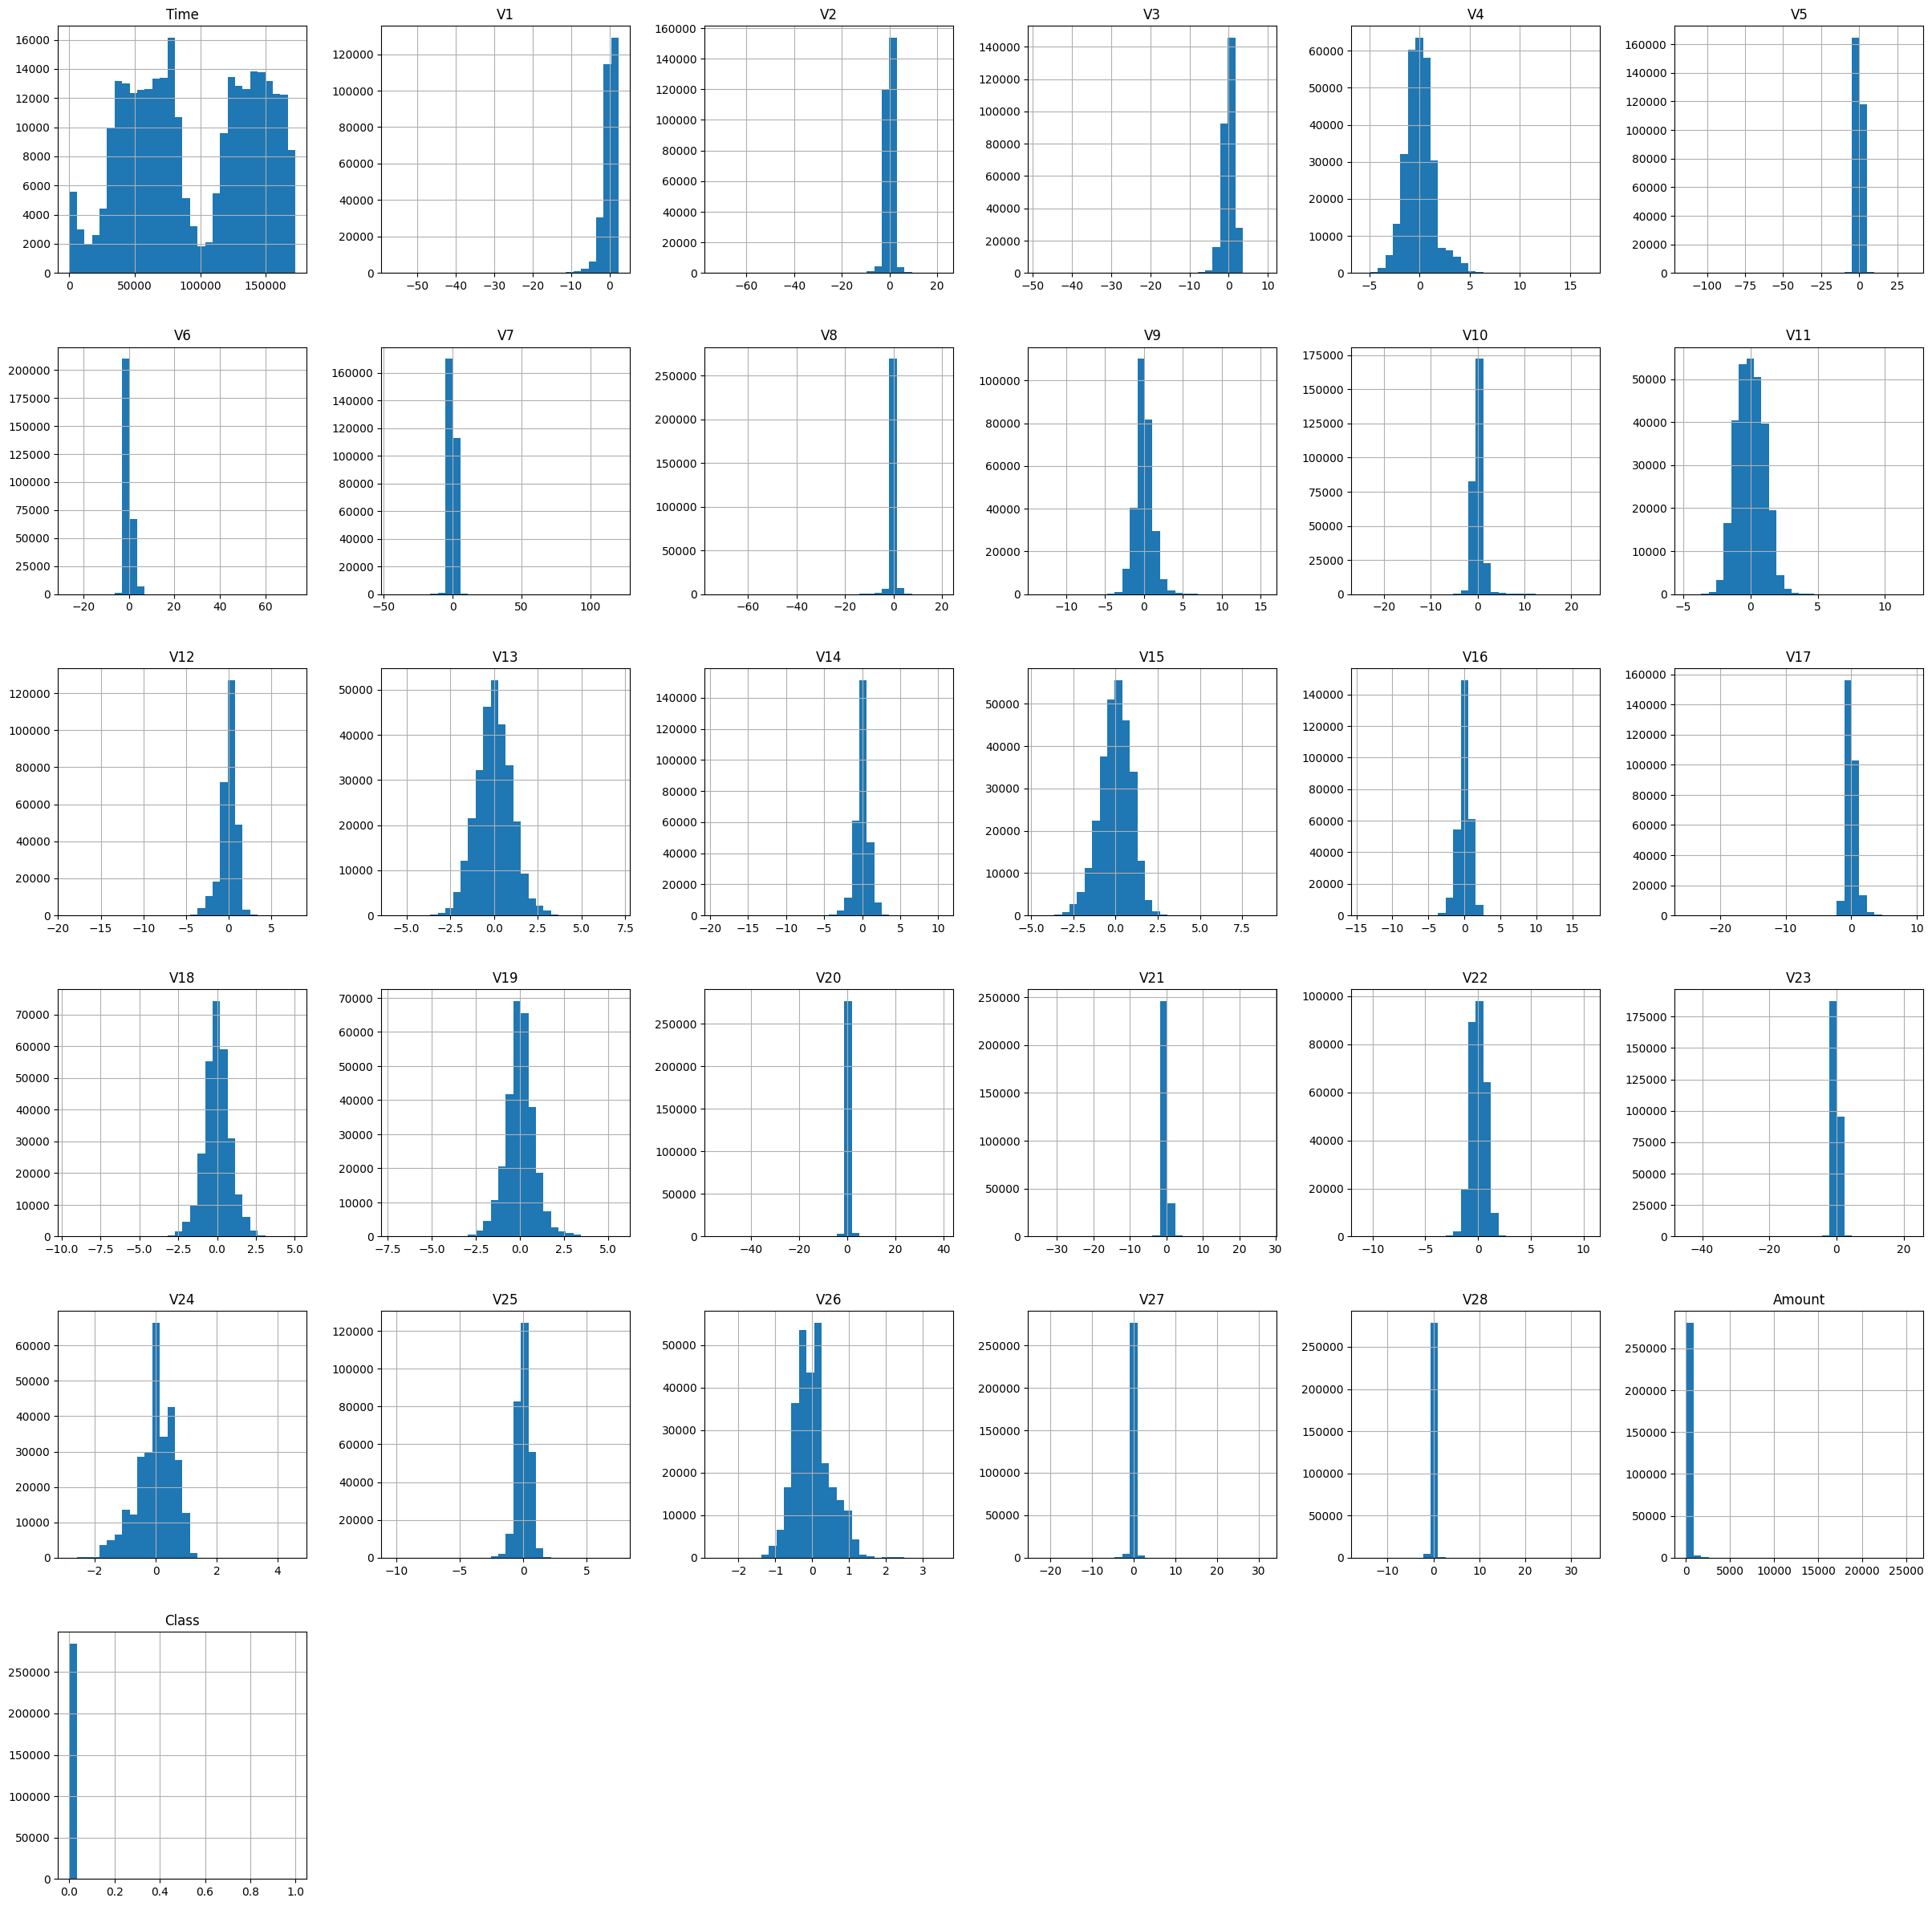

In [6]:
df.hist(bins=30, figsize=(30, 30))

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
from sklearn.preprocessing import RobustScaler
new_df = df.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1, 1))
time = new_df['Time']
new_df['Time'] = (time - time.min()) / (time.max() - time.min())
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


In [9]:
new_df = new_df.sample(frac=1, random_state=1)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.693938,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.282401,0
127467,0.453377,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.279746,0
137900,0.476770,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.294977,0
21513,0.183556,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.084119,0
134700,0.468326,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.296793,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,0.183261,-2.986845,-8.663978,-1.910863,0.664058,-3.934875,0.861269,1.647511,-0.480963,-1.546866,...,1.252092,-0.993085,-2.173147,0.145570,-0.235062,-0.227411,-0.382702,0.404045,32.002515,0
117583,0.432480,0.937083,-0.849673,0.524186,-0.020031,-0.606327,0.692302,-0.463724,0.148857,0.785062,...,-0.143322,-0.479981,-0.237902,-0.715247,0.251418,0.975406,-0.060168,0.023771,2.086495,0
73349,0.318852,-1.149963,1.696462,1.637114,2.658991,-0.021502,0.192287,0.205204,0.588754,-1.187820,...,0.025147,0.086506,-0.262748,0.321538,0.341667,0.210343,-0.162047,0.031193,-0.201495,0
267336,0.941757,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,0.858635,...,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,1.017257,0


In [10]:
train, test, val = new_df[:240000], new_df[240000:262000], new_df[262000:]
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()

(Class
 0    239589
 1       411
 Name: count, dtype: int64,
 Class
 0    21955
 1       45
 Name: count, dtype: int64,
 Class
 0    22771
 1       36
 Name: count, dtype: int64)

In [11]:
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train_np.shape, test_np.shape, val_np.shape

((240000, 31), (22000, 31), (22807, 31))

In [12]:
x_train, y_train = train_np[:, :-1], train_np[:, -1]
x_test, y_test = test_np[:, :-1], test_np[:, -1]
x_val, y_val = val_np[:, :-1], val_np[:, -1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((240000, 30), (240000,), (22000, 30), (22000,), (22807, 30), (22807,))

In [13]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_model.score(x_train, y_train)

0.9992375

99.4% data is non fraudulent or valid transactions where as 0.6% are fraudulent transactions. Hence the data is highly imbalanced

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

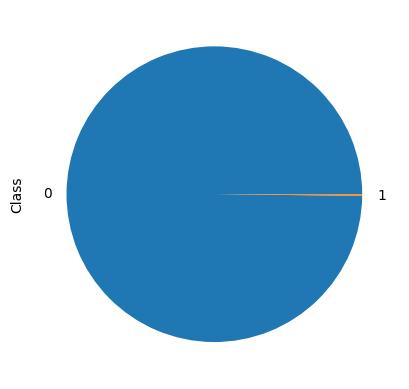

In [14]:

#checkinf the class distribution of the target variable in percentage
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)
((df.groupby('Class')['Class'].count()/df['Class'].count())*100).plot.pie()


In [15]:

#checking the % distribution of normal vs fraud
classes = df['Class'].value_counts()
normal_share = classes[0]/df['Class'].count()*100
fraud_share= classes[1]/df['Class'].count()*100

print(normal_share)
print(fraud_share)


99.82725143693798
0.1727485630620034


In [16]:
# checking the correlation
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_val, logistic_model.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.73      0.53      0.61        36

    accuracy                           1.00     22807
   macro avg       0.87      0.76      0.81     22807
weighted avg       1.00      1.00      1.00     22807



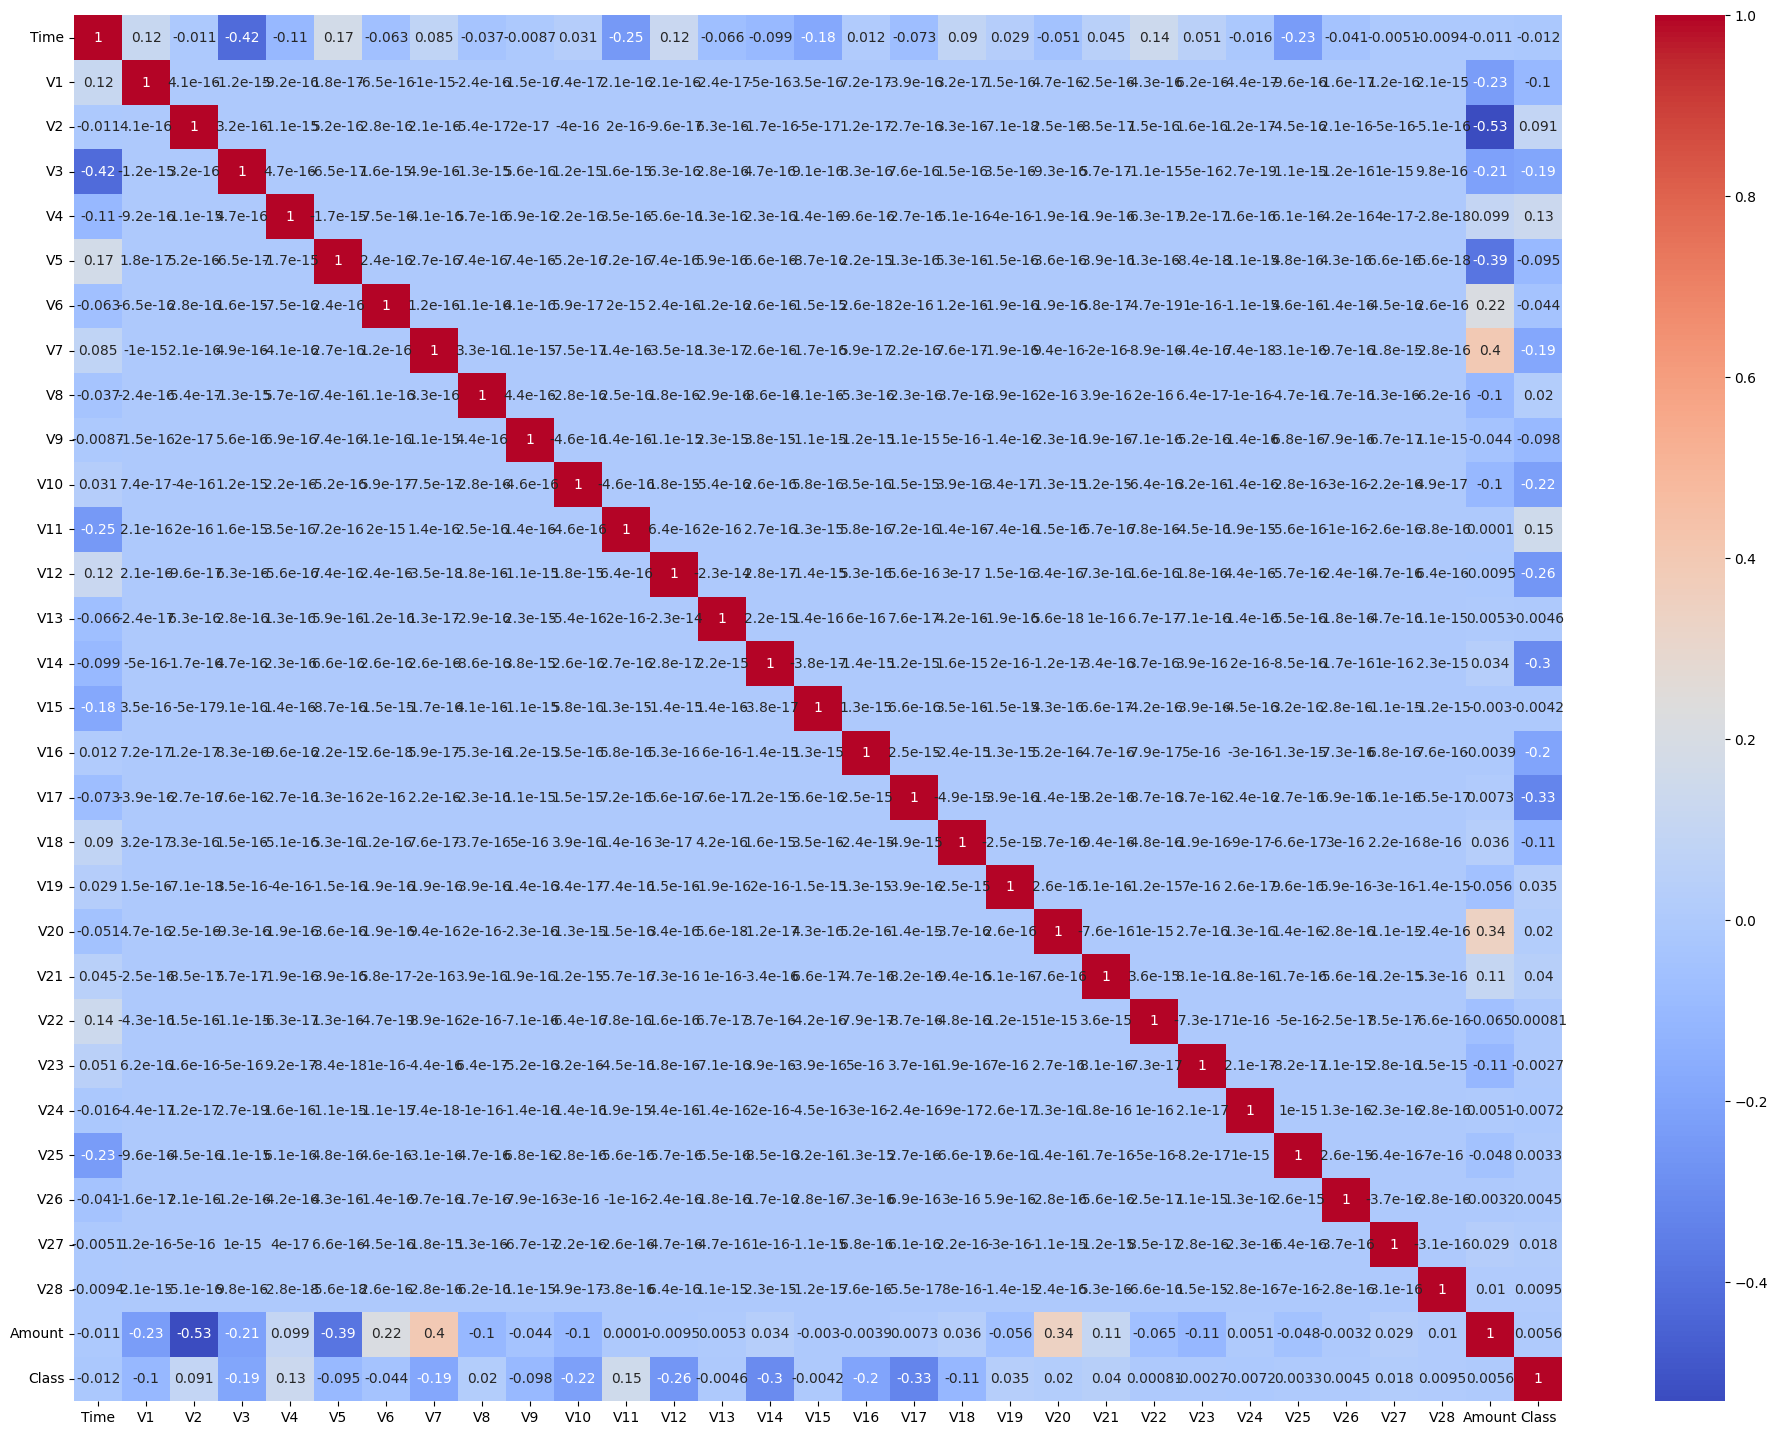

In [18]:

#checking correlation in heatmap
plt.figure(figsize=(24,18))

sns.heatmap(corr, cmap = "coolwarm", annot = True)
plt.show()


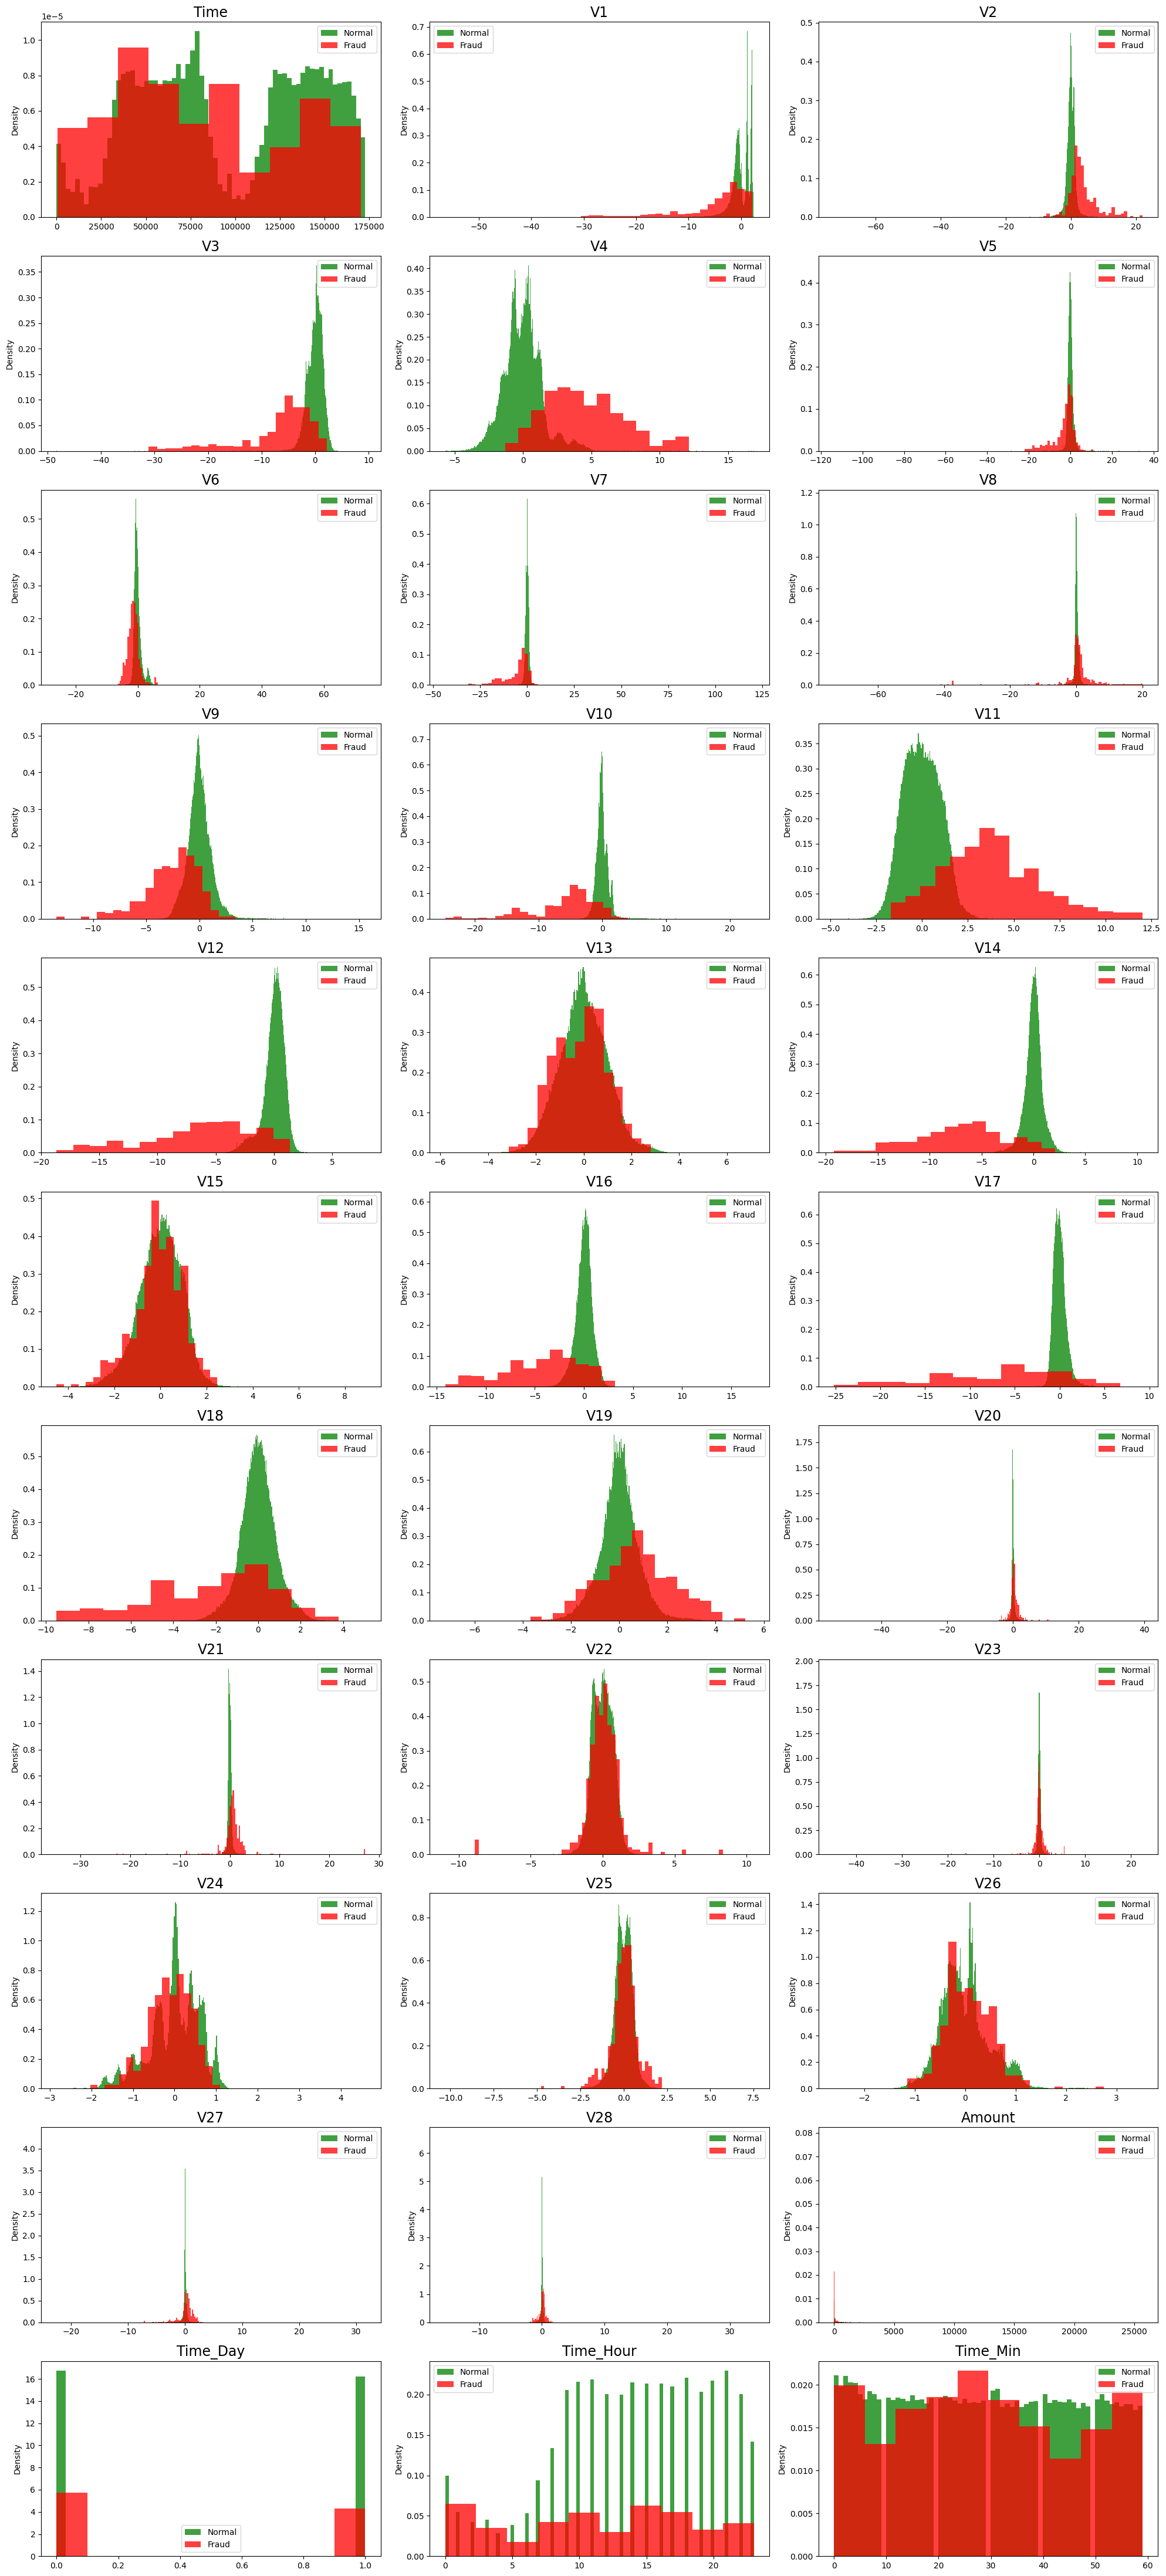

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature engineering
Delta_Time = pd.to_timedelta(df['Time'], unit='s')
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

# Splitting data into train and test data
y = df['Class']
X = df.drop(['Class'], axis=1)

# Splitting the dataset using train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

# Accumulating all the column names under one variable
cols = list(X.columns.values)

# Define normal and fraud records
normal_records = df['Class'] == 0
fraud_records = df['Class'] == 1

# Plotting histograms for each variable
num_cols = len(cols)
num_rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)

plt.figure(figsize=(20, num_rows * 4))

# Iterate over each column
for n, col in enumerate(cols):
    plt.subplot(num_rows, 3, n + 1)

    # Plot histogram for normal records (Class == 0)
    sns.histplot(df.loc[normal_records, col], color='green', kde=False, stat="density", linewidth=0)

    # Overlay histogram for fraud records (Class == 1) in red
    sns.histplot(df.loc[fraud_records, col], color='red', kde=False, stat="density", linewidth=0)

    plt.title(col, fontsize=17)
    plt.xlabel('')
    plt.ylabel('Density')
    plt.legend(labels=['Normal', 'Fraud'])

plt.tight_layout()
plt.show()


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_val, logistic_model.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.73      0.53      0.61        36

    accuracy                           1.00     22807
   macro avg       0.87      0.76      0.81     22807
weighted avg       1.00      1.00      1.00     22807



In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

shallow_nn = Sequential()
shallow_nn.add(InputLayer((x_train.shape[1],)))
shallow_nn.add(Dense(2, 'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn', save_best_only=True)
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
shallow_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 62        
                                                                 
 batch_normalization (Batch  (None, 2)                 8         
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 69 (276.00 Byte)
Non-trainable params: 4 (16.00 Byte)
_________________________________________________________________


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# Example dataset creation, assuming 'df' is your dataframe
# and it has been preprocessed as shown in your feature engineering step

# Feature engineering
Delta_Time = pd.to_timedelta(df['Time'], unit='s')
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

# Splitting data into X and y
y = df['Class']
X = df.drop(['Class'], axis=1)

# Splitting the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

# Further splitting training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=100, test_size=0.25)

# Ensure x_train and y_train have the same number of samples
if X_train.shape[0] != y_train.shape[0]:
    min_samples = min(X_train.shape[0], y_train.shape[0])
    X_train = X_train[:min_samples]
    y_train = y_train[:min_samples]

# Ensure x_val and y_val have the same number of samples
if X_val.shape[0] != y_val.shape[0]:
    min_val_samples = min(X_val.shape[0], y_val.shape[0])
    X_val = X_val[:min_val_samples]
    y_val = y_val[:min_val_samples]

# Model definition
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

shallow_nn = Sequential()
shallow_nn.add(InputLayer((X_train.shape[1],)))
shallow_nn.add(Dense(2, activation='relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, activation='sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn', save_best_only=True)
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
shallow_nn.summary()

# Fit the model
shallow_nn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, callbacks=[checkpoint])

# Evaluate the model on the test set
y_pred = shallow_nn.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, y_pred_classes, target_names=['Not Fraud', 'Fraud']))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 68        
                                                                 
 batch_normalization_1 (Bat  (None, 2)                 8         
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 79 (316.00 Byte)
Trainable params: 75 (300.00 Byte)
Non-trainable params: 4 (16.00 Byte)
_________________________________________________________________
Epoch 1/5
5341/5341 [==============================] - 14s 2ms/step - loss: 0.0823 - accuracy: 0.9751 - val_loss: 0.0154 - val_accuracy: 0.9983
Epoch 2/5
5341/5341 [==============================] - 12s 2ms/step - l

In [24]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")



Shape of X_train: (170883, 33)
Shape of X_val: (56962, 33)


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

# Example dataset creation, assuming 'df' is your dataframe
# and it has been preprocessed as shown in your feature engineering step

# Feature engineering
Delta_Time = pd.to_timedelta(df['Time'], unit='s')
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

# Splitting data into X and y
y = df['Class']
X = df.drop(['Class'], axis=1)

# Splitting the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

# Further splitting training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=100, test_size=0.25)

# Ensure the same preprocessing steps for both sets if any additional feature engineering is required

# Model definition
shallow_nn = Sequential()
shallow_nn.add(InputLayer((X_train.shape[1],)))  # Ensure the input layer matches the feature count of X_train
shallow_nn.add(Dense(2, activation='relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, activation='sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn', save_best_only=True)
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
shallow_nn.summary()

# Fit the model
shallow_nn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, callbacks=[checkpoint])

# Function to make predictions
def neural_net_predictions(model, x):
    return (model.predict(x).flatten() > 0.5).astype(int)

# Check the shape of x_train and x_val
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")

# Make predictions on the validation set
y_val_pred = neural_net_predictions(shallow_nn, X_val)

# Print classification report
print(classification_report(y_val, y_val_pred, target_names=['Not Fraud', 'Fraud']))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 68        
                                                                 
 batch_normalization_2 (Bat  (None, 2)                 8         
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 79 (316.00 Byte)
Trainable params: 75 (300.00 Byte)
Non-trainable params: 4 (16.00 Byte)
_________________________________________________________________
Epoch 1/5
5341/5341 [==============================] - 15s 3ms/step - loss: 0.0661 - accuracy: 0.9975 - val_loss: 0.0125 - val_accuracy: 0.9983
Epoch 2/5
5341/5341 [==============================] - 13s 3ms/step - l

In [26]:
# Assuming X_train, X_val, y_train, y_val are already defined with 33 features

# Neural Network Predictions
def neural_net_predictions(model, x):
    return (model.predict(x).flatten() > 0.5).astype(int)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")

y_val_pred = neural_net_predictions(shallow_nn, X_val)
print(classification_report(y_val, y_val_pred, target_names=['Not Fraud', 'Fraud']))


Shape of X_train: (170883, 33)
Shape of X_val: (56962, 33)
1781/1781 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56866
       Fraud       0.00      0.00      0.00        96

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Fit the RandomForest model
rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_val)
print(classification_report(y_val, rf_predictions, target_names=['Not Fraud', 'Fraud']))

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Fit the Gradient Boosting model
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(X_train, y_train)
gbc_predictions = gbc.predict(X_val)
print(classification_report(y_val, gbc_predictions, target_names=['Not Fraud', 'Fraud']))


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56866
       Fraud       0.88      0.52      0.65        96

    accuracy                           1.00     56962
   macro avg       0.94      0.76      0.83     56962
weighted avg       1.00      1.00      1.00     56962

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56866
       Fraud       0.80      0.71      0.75        96

    accuracy                           1.00     56962
   macro avg       0.90      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [28]:

from sklearn.model_selection import train_test_split
# Split the dataset into train and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=100, test_size=0.2, stratify=y)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Fit the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(X_train, y_train)

# Make predictions on the validation set
gbc_predictions = gbc.predict(X_val)

# Print classification report
print(classification_report(y_val, gbc_predictions, target_names=['Not Fraud', 'Fraud']))


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       0.70      0.69      0.70        98

    accuracy                           1.00     56962
   macro avg       0.85      0.85      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [29]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Fit the SVM model
svc = LinearSVC(class_weight='balanced')
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_val)
print(classification_report(y_val, svc_predictions, target_names=['Not Fraud', 'Fraud']))


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       0.41      0.43      0.42        98

    accuracy                           1.00     56962
   macro avg       0.71      0.71      0.71     56962
weighted avg       1.00      1.00      1.00     56962



In [30]:
from sklearn.linear_model import LogisticRegression

# Fit the Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_val)
print(classification_report(y_val, lr_predictions, target_names=['Not Fraud', 'Fraud']))


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       0.86      0.61      0.71        98

    accuracy                           1.00     56962
   macro avg       0.93      0.81      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [50]:
from sklearn.neighbors import KNeighborsClassifier

# Fit the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_val)
print(classification_report(y_val, knn_predictions, target_names=['Not Fraud', 'Fraud']))


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       1.00      0.04      0.08        98

    accuracy                           1.00     56962
   macro avg       1.00      0.52      0.54     56962
weighted avg       1.00      1.00      1.00     56962



In [51]:
from sklearn.tree import DecisionTreeClassifier

# Fit the Decision Tree model
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_val)
print(classification_report(y_val, dt_predictions, target_names=['Not Fraud', 'Fraud']))


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       0.88      0.78      0.83        98

    accuracy                           1.00     56962
   macro avg       0.94      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [52]:
from xgboost import XGBClassifier

# Fit the XGBoost model
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_val)
print(classification_report(y_val, xgb_predictions, target_names=['Not Fraud', 'Fraud']))


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       0.94      0.76      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [53]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")


Shape of X_train: (227845, 33)
Shape of y_train: (227845,)
Shape of X_val: (56962, 33)
Shape of y_val: (56962,)


In [54]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.693938,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.282401,0
127467,0.453377,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.279746,0
137900,0.476770,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.294977,0
21513,0.183556,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.084119,0
134700,0.468326,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.296793,0


In [55]:
not_frauds = new_df.query('Class == 0')
frauds = new_df.query('Class == 1')
not_frauds['Class'].value_counts(), frauds['Class'].value_counts()

(Class
 0    284315
 Name: count, dtype: int64,
 Class
 1    492
 Name: count, dtype: int64)

In [56]:
balanced_df = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
balanced_df['Class'].value_counts()

Class
1    492
0    492
Name: count, dtype: int64

In [57]:
balanced_df = balanced_df.sample(frac=1, random_state=1)
balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18372,0.170309,-1.762593,0.256143,1.683125,-1.279233,-1.902762,1.004210,-1.009748,-2.432546,0.458860,...,2.493579,0.320829,-0.535481,0.499401,-0.915196,-0.423434,0.107049,0.175922,2.906449,0
96341,0.380388,1.227614,-0.668974,-0.271785,-0.589440,-0.604795,-0.350285,-0.486365,-0.010809,-0.794944,...,-0.026055,-0.295255,-0.180459,-0.436539,0.494649,-0.283738,-0.001128,0.035075,1.062111,1
248296,0.890522,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,...,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,-0.307413,1
264328,0.933932,-0.011624,0.640413,0.868046,-0.505279,0.261938,0.223098,0.239049,0.150877,0.225142,...,0.069401,0.268024,0.261459,0.683742,-1.567901,-0.816674,0.185781,0.283021,-0.272619,0
208904,0.794730,-0.679341,1.217389,-0.316778,-1.086725,0.855349,-0.980760,0.970589,0.133116,-0.357671,...,-0.083048,-0.137032,-0.238920,-0.617244,0.039020,-0.081848,0.234633,0.128382,-0.307273,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81557,0.341393,-4.502731,-3.876484,1.341248,0.113400,0.189428,-0.560985,-0.140478,0.684651,0.475363,...,-0.140218,0.049411,2.313731,0.252330,0.307219,0.859051,0.184033,-0.308269,4.227625,0
276071,0.965803,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,-0.140927,...,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,-0.028645,1
175971,0.709373,1.972989,0.157281,-1.715078,1.207451,0.681612,-0.615282,0.601791,-0.291935,-0.132265,...,0.098640,0.467533,-0.078973,-0.371882,0.486038,-0.490665,-0.018374,-0.070911,0.075735,0
27738,0.200727,-2.439237,2.591458,-2.840126,1.286244,-1.777016,-1.436139,-2.206056,-2.282725,-0.292885,...,1.774460,-0.771390,0.065727,0.103916,-0.057578,0.242652,-0.268649,-0.743713,1.443443,1


In [58]:
balanced_df_np = balanced_df.to_numpy()

x_train_b, y_train_b = balanced_df_np[:700, :-1], balanced_df_np[:700, -1].astype(int)
x_test_b, y_test_b = balanced_df_np[700:842, :-1], balanced_df_np[700:842, -1].astype(int)
x_val_b, y_val_b = balanced_df_np[842:, :-1], balanced_df_np[842:, -1].astype(int)
x_train_b.shape, y_train_b.shape, x_test_b.shape, y_test_b.shape, x_val_b.shape, y_val_b.shape

((700, 30), (700,), (142, 30), (142,), (142, 30), (142,))

In [59]:
import pandas as pd

pd.Series(y_train_b).value_counts(), pd.Series(y_test_b).value_counts(), pd.Series(y_val_b).value_counts()

(1    353
 0    347
 Name: count, dtype: int64,
 0    73
 1    69
 Name: count, dtype: int64,
 0    72
 1    70
 Name: count, dtype: int64)

In [60]:
logistic_model_b = LogisticRegression()
logistic_model_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, logistic_model_b.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.96      0.93      0.94        72
       Fraud       0.93      0.96      0.94        70

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142



In [61]:
shallow_nn_b = Sequential()
shallow_nn_b.add(InputLayer((x_train.shape[1],)))
shallow_nn_b.add(Dense(2, 'relu'))
shallow_nn_b.add(BatchNormalization())
shallow_nn_b.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn_b', save_best_only=True)
shallow_nn_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn_b.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
22/22 [==============================] - 2s 40ms/step - loss: 0.7580 - accuracy: 0.5357 - val_loss: 0.5825 - val_accuracy: 0.6620
Epoch 2/40
22/22 [==============================] - 1s 33ms/step - loss: 0.7260 - accuracy: 0.5729 - val_loss: 0.5697 - val_accuracy: 0.7042
Epoch 3/40
22/22 [==============================] - 1s 34ms/step - loss: 0.6910 - accuracy: 0.5871 - val_loss: 0.5598 - val_accuracy: 0.7535
Epoch 4/40
22/22 [==============================] - 1s 33ms/step - loss: 0.6678 - accuracy: 0.6343 - val_loss: 0.5499 - val_accuracy: 0.7746
Epoch 5/40
22/22 [==============================] - 1s 33ms/step - loss: 0.6424 - accuracy: 0.6429 - val_loss: 0.5371 - val_accuracy: 0.7958
Epoch 6/40
22/22 [==============================] - 1s 43ms/step - loss: 0.6078 - accuracy: 0.6800 - val_loss: 0.5200 - val_accuracy: 0.8099
Epoch 7/40
22/22 [==============================] - 1s 47ms/step - loss: 0.5804 - accuracy: 0.7129 - val_loss: 0.5048 - val_accuracy: 0.8169
Epoch 8/40
22

In [62]:
shallow_nn_b.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
22/22 [==============================] - 1s 50ms/step - loss: 0.2395 - accuracy: 0.9200 - val_loss: 0.2333 - val_accuracy: 0.9085
Epoch 2/40
22/22 [==============================] - 1s 49ms/step - loss: 0.2373 - accuracy: 0.9129 - val_loss: 0.2256 - val_accuracy: 0.9155
Epoch 3/40
22/22 [==============================] - 0s 4ms/step - loss: 0.2360 - accuracy: 0.9200 - val_loss: 0.2262 - val_accuracy: 0.9155
Epoch 4/40
22/22 [==============================] - 1s 46ms/step - loss: 0.2331 - accuracy: 0.9314 - val_loss: 0.2215 - val_accuracy: 0.9155
Epoch 5/40
22/22 [==============================] - 1s 33ms/step - loss: 0.2374 - accuracy: 0.9157 - val_loss: 0.2196 - val_accuracy: 0.9155
Epoch 6/40
22/22 [==============================] - 1s 33ms/step - loss: 0.2240 - accuracy: 0.9271 - val_loss: 0.2173 - val_accuracy: 0.9155
Epoch 7/40
22/22 [==============================] - 1s 33ms/step - loss: 0.2195 - accuracy: 0.9314 - val_loss: 0.2167 - val_accuracy: 0.9155
Epoch 8/40
22/

In [63]:
print(classification_report(y_val_b, neural_net_predictions(shallow_nn_b, x_val_b), target_names=['Not Fraud', 'Fraud']))

5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

   Not Fraud       0.92      0.93      0.92        72
       Fraud       0.93      0.91      0.92        70

    accuracy                           0.92       142
   macro avg       0.92      0.92      0.92       142
weighted avg       0.92      0.92      0.92       142



In [64]:
shallow_nn_b1 = Sequential()
shallow_nn_b1.add(InputLayer((x_train.shape[1],)))
shallow_nn_b1.add(Dense(1, 'relu'))
shallow_nn_b1.add(BatchNormalization())
shallow_nn_b1.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn_b1', save_best_only=True)
shallow_nn_b1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn_b1.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
22/22 [==============================] - 2s 40ms/step - loss: 0.6808 - accuracy: 0.5000 - val_loss: 0.6450 - val_accuracy: 0.5634
Epoch 2/40
22/22 [==============================] - 1s 32ms/step - loss: 0.6519 - accuracy: 0.6143 - val_loss: 0.5962 - val_accuracy: 0.6620
Epoch 3/40
22/22 [==============================] - 2s 80ms/step - loss: 0.6189 - accuracy: 0.7143 - val_loss: 0.5574 - val_accuracy: 0.7324
Epoch 4/40
22/22 [==============================] - 1s 47ms/step - loss: 0.5942 - accuracy: 0.7857 - val_loss: 0.5358 - val_accuracy: 0.7887
Epoch 5/40
22/22 [==============================] - 1s 50ms/step - loss: 0.5814 - accuracy: 0.8043 - val_loss: 0.5202 - val_accuracy: 0.8451
Epoch 6/40
22/22 [==============================] - 1s 43ms/step - loss: 0.5639 - accuracy: 0.8314 - val_loss: 0.5100 - val_accuracy: 0.8803
Epoch 7/40
22/22 [==============================] - 1s 32ms/step - loss: 0.5538 - accuracy: 0.8371 - val_loss: 0.4988 - val_accuracy: 0.9014
Epoch 8/40
22

In [65]:
shallow_nn_b1.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
22/22 [==============================] - 1s 45ms/step - loss: 0.2911 - accuracy: 0.9086 - val_loss: 0.2589 - val_accuracy: 0.9296
Epoch 2/40
22/22 [==============================] - 1s 47ms/step - loss: 0.2885 - accuracy: 0.9057 - val_loss: 0.2564 - val_accuracy: 0.9296
Epoch 3/40
22/22 [==============================] - 1s 47ms/step - loss: 0.2944 - accuracy: 0.9000 - val_loss: 0.2541 - val_accuracy: 0.9296
Epoch 4/40
22/22 [==============================] - 1s 50ms/step - loss: 0.2706 - accuracy: 0.9214 - val_loss: 0.2494 - val_accuracy: 0.9296
Epoch 5/40
22/22 [==============================] - 1s 41ms/step - loss: 0.2749 - accuracy: 0.9129 - val_loss: 0.2477 - val_accuracy: 0.9296
Epoch 6/40
22/22 [==============================] - 1s 32ms/step - loss: 0.2810 - accuracy: 0.9071 - val_loss: 0.2441 - val_accuracy: 0.9296
Epoch 7/40
22/22 [==============================] - 1s 32ms/step - loss: 0.2674 - accuracy: 0.9186 - val_loss: 0.2424 - val_accuracy: 0.9296
Epoch 8/40
22

In [66]:
print(classification_report(y_val_b, neural_net_predictions(shallow_nn_b1, x_val_b), target_names=['Not Fraud', 'Fraud']))

5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

   Not Fraud       0.92      0.94      0.93        72
       Fraud       0.94      0.91      0.93        70

    accuracy                           0.93       142
   macro avg       0.93      0.93      0.93       142
weighted avg       0.93      0.93      0.93       142



In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming x_train_b, y_train_b, x_val_b, y_val_b are correctly prepared

# Create and fit the RandomForestClassifier
rf_b = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf_b.fit(x_train_b, y_train_b)

# Make predictions on the validation set
rf_b_predictions = rf_b.predict(x_val_b)

# Print classification report
print(classification_report(y_val_b, rf_b_predictions, target_names=['Not Fraud', 'Fraud']))


              precision    recall  f1-score   support

   Not Fraud       0.93      0.97      0.95        72
       Fraud       0.97      0.93      0.95        70

    accuracy                           0.95       142
   macro avg       0.95      0.95      0.95       142
weighted avg       0.95      0.95      0.95       142



In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Assuming x_train_b, y_train_b, x_val_b, y_val_b are correctly prepared

# Create and fit the GradientBoostingClassifier
gbc_b = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=2, random_state=0)
gbc_b.fit(x_train_b, y_train_b)

# Make predictions on the validation set
gbc_b_predictions = gbc_b.predict(x_val_b)

# Print classification report
print(classification_report(y_val_b, gbc_b_predictions, target_names=['Not Fraud', 'Fraud']))


              precision    recall  f1-score   support

   Not Fraud       0.94      0.92      0.93        72
       Fraud       0.92      0.94      0.93        70

    accuracy                           0.93       142
   macro avg       0.93      0.93      0.93       142
weighted avg       0.93      0.93      0.93       142



In [47]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Assuming x_train_b, y_train_b, x_val_b, y_val_b are correctly prepared

# Create and fit the LinearSVC classifier
svc_b = LinearSVC(class_weight='balanced')
svc_b.fit(x_train_b, y_train_b)

# Make predictions on the validation set
svc_b_predictions = svc_b.predict(x_val_b)

# Print classification report
print(classification_report(y_val_b, svc_b_predictions, target_names=['Not Fraud', 'Fraud']))


              precision    recall  f1-score   support

   Not Fraud       0.96      0.93      0.94        72
       Fraud       0.93      0.96      0.94        70

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142



In [70]:
from sklearn.linear_model import LogisticRegression

# Create and fit the Logistic Regression classifier
lr_b = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_b.fit(x_train_b, y_train_b)

# Make predictions on the validation set
lr_b_predictions = lr_b.predict(x_val_b)

# Print classification report
print(classification_report(y_val_b, lr_b_predictions, target_names=['Not Fraud', 'Fraud']))


              precision    recall  f1-score   support

   Not Fraud       0.96      0.93      0.94        72
       Fraud       0.93      0.96      0.94        70

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142



In [48]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Assuming x_train_b, y_train_b, x_val_b, y_val_b are correctly prepared

# Create and fit the LinearSVC classifier
svc_b = LinearSVC(class_weight='balanced')
svc_b.fit(x_train_b, y_train_b)

# Make predictions on the validation set
svc_b_predictions = svc_b.predict(x_val_b)

# Print classification report
print(classification_report(y_val_b, svc_b_predictions, target_names=['Not Fraud', 'Fraud']))


              precision    recall  f1-score   support

   Not Fraud       0.96      0.93      0.94        72
       Fraud       0.93      0.96      0.94        70

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142



In [71]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the KNN classifier
knn_b = KNeighborsClassifier(n_neighbors=5)
knn_b.fit(x_train_b, y_train_b)

# Make predictions on the validation set
knn_b_predictions = knn_b.predict(x_val_b)

# Print classification report
print(classification_report(y_val_b, knn_b_predictions, target_names=['Not Fraud', 'Fraud']))


              precision    recall  f1-score   support

   Not Fraud       0.94      0.94      0.94        72
       Fraud       0.94      0.94      0.94        70

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142



In [72]:
from sklearn.tree import DecisionTreeClassifier

# Create and fit the Decision Tree classifier
dt_b = DecisionTreeClassifier(class_weight='balanced', max_depth=5)
dt_b.fit(x_train_b, y_train_b)

# Make predictions on the validation set
dt_b_predictions = dt_b.predict(x_val_b)

# Print classification report
print(classification_report(y_val_b, dt_b_predictions, target_names=['Not Fraud', 'Fraud']))


              precision    recall  f1-score   support

   Not Fraud       0.97      0.86      0.91        72
       Fraud       0.87      0.97      0.92        70

    accuracy                           0.92       142
   macro avg       0.92      0.92      0.92       142
weighted avg       0.92      0.92      0.92       142



In [73]:
from xgboost import XGBClassifier

# Create and fit the XGBoost classifier
xgb_b = XGBClassifier(scale_pos_weight=(np.sum(y_train_b == 0) / np.sum(y_train_b == 1)))
xgb_b.fit(x_train_b, y_train_b)

# Make predictions on the validation set
xgb_b_predictions = xgb_b.predict(x_val_b)

# Print classification report
print(classification_report(y_val_b, xgb_b_predictions, target_names=['Not Fraud', 'Fraud']))


              precision    recall  f1-score   support

   Not Fraud       0.96      0.96      0.96        72
       Fraud       0.96      0.96      0.96        70

    accuracy                           0.96       142
   macro avg       0.96      0.96      0.96       142
weighted avg       0.96      0.96      0.96       142



In [74]:
print(classification_report(y_test_b, neural_net_predictions(shallow_nn_b, x_test_b), target_names=['Not Fraud', 'Fraud']))

5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

   Not Fraud       0.90      0.97      0.93        73
       Fraud       0.97      0.88      0.92        69

    accuracy                           0.93       142
   macro avg       0.93      0.93      0.93       142
weighted avg       0.93      0.93      0.93       142

